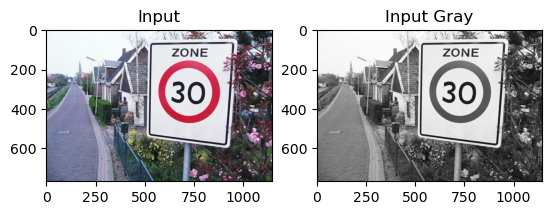

In [1]:
import cv2
import math
import numpy as np
from strokes_funct import edge_funct, strokes_funct
from matplotlib import pyplot as plt
from skimage import filters, transform
from scipy import signal

from skimage import data, img_as_float
from skimage import exposure
cv2.saliency

##input
image = cv2.imread('inputs/7--129.jpg')
scale_percent = 100 # percent of original size
height = int(image.shape[0] * scale_percent / 100)
width = int(image.shape[1] * scale_percent / 100)

dim = (width, height)

image= cv2.resize(image, dim) #redimensionar
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) ##grises

gray=gray.astype(float)
gray=filters.gaussian(gray,0.2, truncate=2)

ax1=plt.subplot(221)
ax1.imshow(image,cmap='gray')
ax1.set_title('Input')
ax2=plt.subplot(222)
ax2.imshow(gray,cmap='gray')
ax2.set_title('Input Gray')
plt.show()

## Saliency

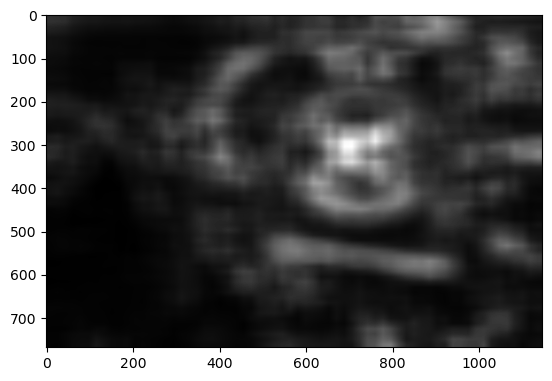

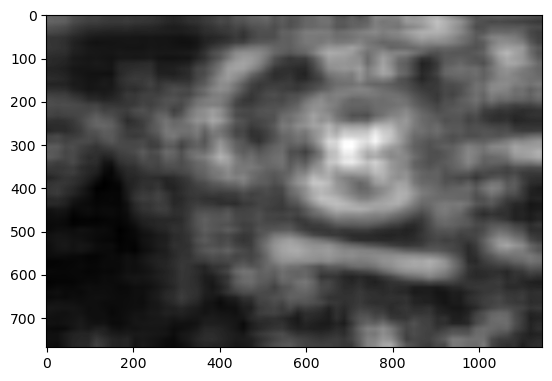

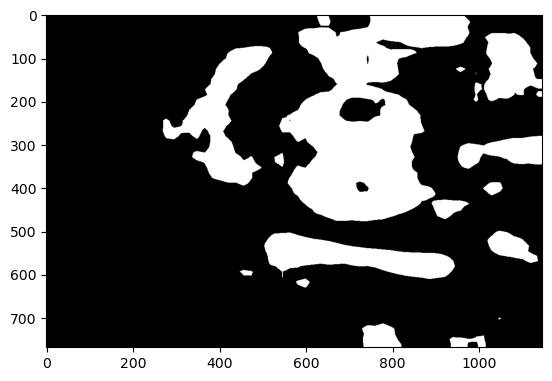

880896


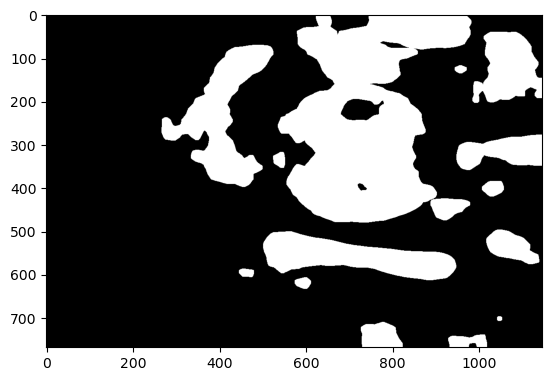

In [2]:
from skimage import morphology
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
#saliencyMap = (saliencyMap * 255).astype("uint8")
salMap=np.sqrt(saliencyMap)
salMap=filters.gaussian(salMap,0.2, truncate=2)
(suc, binMap) = saliency.computeBinaryMap(salMap)
plt.imshow(saliencyMap, cmap='gray')
plt.show()
plt.imshow(salMap, cmap='gray')
plt.show()
plt.imshow(binMap, cmap='gray')
plt.show()

print(salMap.size)

binMap_b=filters.gaussian(binMap,0.2,truncate=2)

binMap_b=morphology.binary_erosion(binMap_b)
binMap_b=morphology.binary_dilation(binMap_b)

binMap_b = np.asarray(binMap_b, dtype="uint8")
kernel = np.ones((7,7),np.uint8)
binMap_b = cv2.dilate(binMap_b,kernel,iterations = 1)

plt.imshow(binMap_b, cmap='gray')
plt.show()


# Multi res contrast pyramid

In [3]:
from get_gp import get_gp

def get_mr_img(gp, draw_mp):
    """
    Return an image from a gaussian pyramid
    """
    n = len(gp)
    r = draw_mp * (n-1)
    rin = r.astype(int)
    a = r - rin
    # rin = 3 - rin

    z = tuple(np.indices((gp[0].shape[0], gp[0].shape[1])))
    # print('a', a.shape, 'r', r.shape, 'rin', rin.shape, 'gp', gp.shape, 'z', z[0].shape, z[1].shape)
    next_m = rin+1
    next_m[next_m==n] = n-1
    # print(np.amax(rin), np.amax(r), n)
    # print('gprin', gp[(rin,) + z].shape)

    out = (1-a) * gp[(rin,) + z] + a * gp[(next_m,)+z]
    return out


(768, 1147)
(768, 1147)
(768, 1147)
(768, 1147)


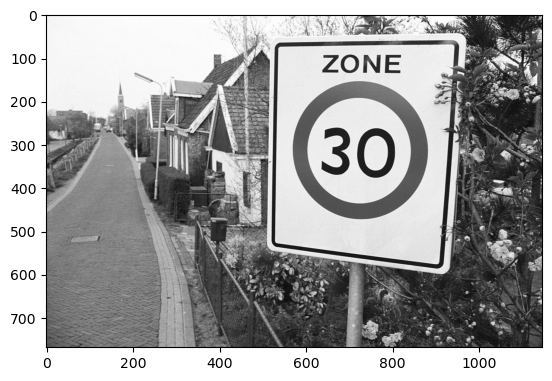

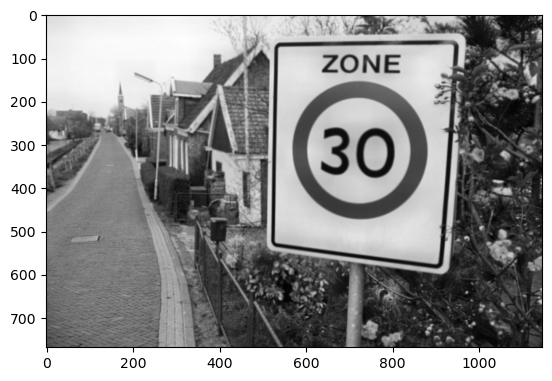

In [4]:
d_map=salMap
mc_gauss_py = [gray]
get_gp(gray, mc_gauss_py, 2, sm_size=True)

[print (i.shape) for i in mc_gauss_py]
mc_gauss_py_arr= np.array(mc_gauss_py)
mres = get_mr_img(mc_gauss_py_arr, d_map)

plt.imshow(gray, cmap='gray')
plt.show()

plt.imshow(mres, cmap='gray')
plt.show()

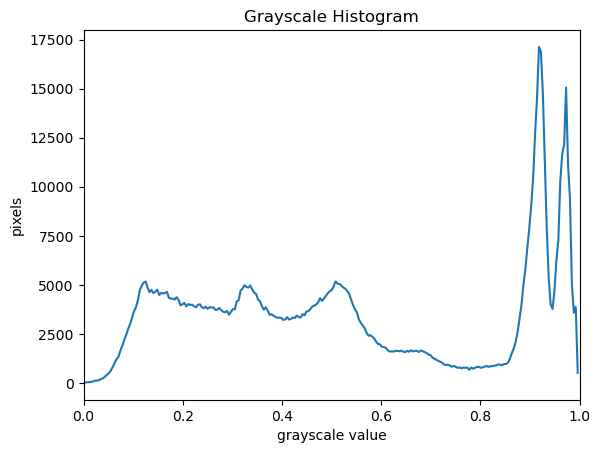

In [5]:
histogram, bin_edges = np.histogram(gray/255, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

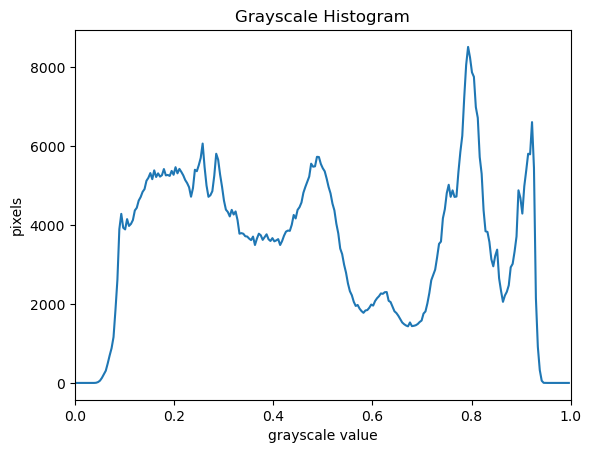

In [6]:
histogram, bin_edges = np.histogram(mres/255, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

## EDGE

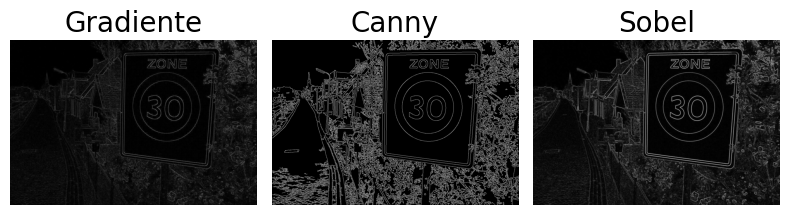

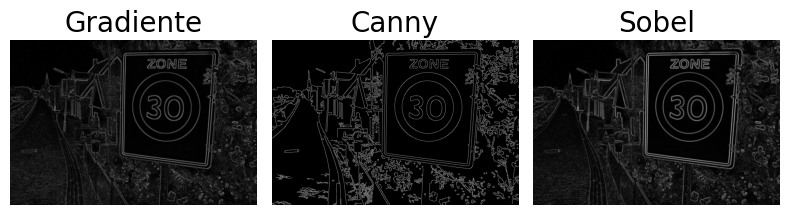

In [7]:
##Bordes
####0=gradiente, 1=canny, 2=sobel
edges=edge_funct(gray,method=0, display=True)
edgesMRES=edge_funct(mres,method=0, display=True)


## STROKE

[[  8.09915475  13.39317425  18.52868108 ... 729.07369627 668.11239029
  598.88638988]
 [ 20.13892314  21.67384751  21.69477225 ... 738.97851186 660.7903773
  613.58941907]
 [ 20.66975477  20.09009705  19.75879851 ... 772.72091418 702.68845051
  622.79439093]
 ...
 [ 75.62309445  95.94806628 108.95174307 ... 197.41602926 184.47725341
  143.98067612]
 [ 81.55583362  95.63750254 101.65838594 ... 124.57045936  76.96771046
   39.02201806]
 [ 66.43340291  75.98745542  72.68779026 ...  27.56012509  10.28281125
    2.63196958]]


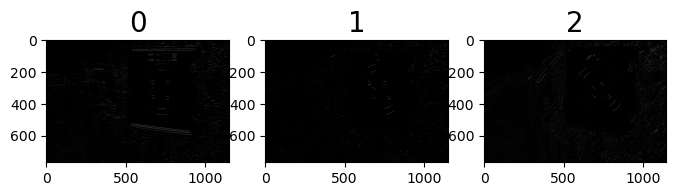

[[  2.09215343   4.95078443   7.5381277  ... 162.17003416 143.57560331
  129.45309759]
 [  8.55018051   9.33487173   9.08459032 ... 175.91625338 146.7522357
  129.50591984]
 [  8.88313988   8.76921967   8.9515653  ... 190.7823235  166.44764791
  154.41194011]
 ...
 [ 53.61367339  64.11233447  72.08331435 ...  66.52193392  61.13678522
   48.51969764]
 [ 53.83911491  64.06791829  69.23955662 ...  41.37126275  25.38047063
   13.2865566 ]
 [ 46.30581176  52.11038488  49.11621017 ...   9.48265755   3.85713869
    0.82323933]]


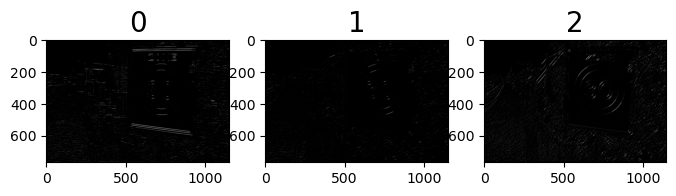

[[0.9944707  0.98552166 0.99042983 ... 0.79845931 0.80138545 0.77763215]
 [0.99367296 0.98248033 0.98340722 ... 0.78775558 0.83159644 0.78899467]
 [0.99054657 0.98087926 0.98333937 ... 0.65948139 0.7241211  0.67144787]
 ...
 [0.98286659 0.95351927 0.97346814 ... 0.93878132 0.97217815 0.97118662]
 [0.97296259 0.94329479 0.95905571 ... 0.8921701  0.939616   0.93138788]
 [0.96835251 0.94088665 0.95629543 ... 0.88348972 0.93138819 0.93417259]]


In [8]:
##STROKE 
LS= 15#int(height*(1/30))
strokes=strokes_funct(edges, lineSize=LS, display=True)
strokesMRES=strokes_funct(edgesMRES, lineSize=LS, display=True)
print(strokes)

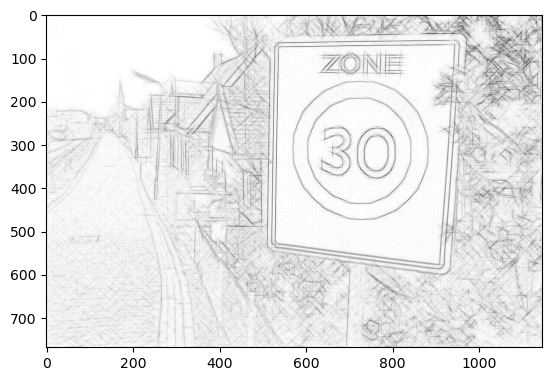

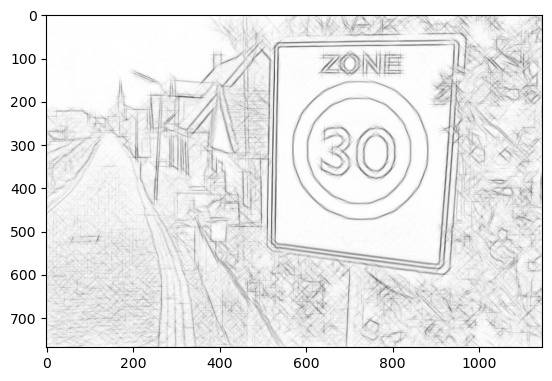

In [9]:
plt.imshow(strokes, cmap='gray')
plt.show()
plt.imshow(strokesMRES, cmap='gray')
plt.show()

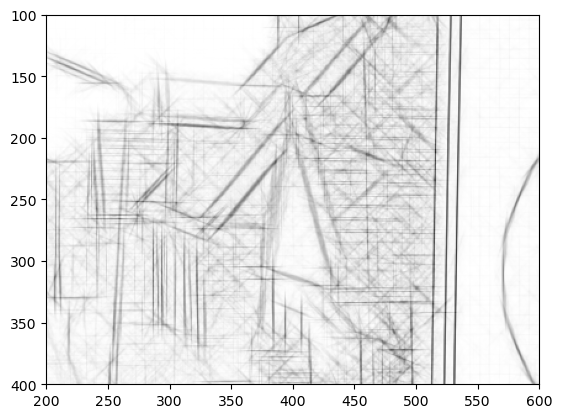

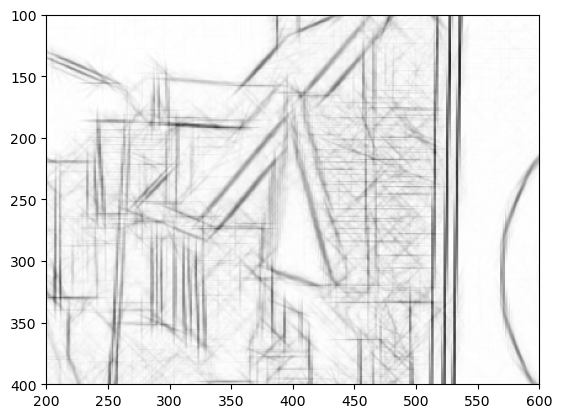

In [10]:
plt.imshow(strokes, cmap='gray') 
plt.xlim(200, 600)
plt.ylim(400,100)
plt.show()
plt.imshow(strokesMRES, cmap='gray') 
plt.xlim(200, 600)
plt.ylim(400,100)
plt.show()

In [11]:
edgesC=edge_funct(gray,method=1)
strokesC=strokes_funct(edgesC, lineSize=LS)
edgesS=edge_funct(gray,method=2)
strokesS=strokes_funct(edgesS, lineSize=LS)

[[0.         0.         0.         ... 3.16270331 2.78950115 2.44043796]
 [0.         0.         0.         ... 3.61523547 3.47247581 2.36998793]
 [0.         0.         0.         ... 3.47972864 2.05775453 0.71338068]
 ...
 [2.28192529 2.75746329 2.86241207 ... 0.         0.         0.        ]
 [1.57742459 2.19474116 2.80638729 ... 0.         0.         0.        ]
 [2.16897504 1.9176078  1.34279146 ... 0.         0.         0.        ]]
[[  5.16909474   9.73134348  14.29648117 ... 379.53569775 343.85252284
  310.94490105]
 [ 15.8993764   18.57295318  20.34910809 ... 437.20765486 398.50391072
  370.81037647]
 [ 20.76507305  21.51221624  21.44464458 ... 483.61053119 453.26362505
  422.99026688]
 ...
 [ 70.73074477  69.90081164  69.57766112 ... 139.43277229 129.42135617
  105.11021166]
 [ 45.85879359  53.91872179  67.70009254 ...  96.78959335  84.85060344
   69.71732443]
 [ 52.63687292  66.54283331  71.93722985 ...  60.39419121  32.09039101
   11.54489587]]


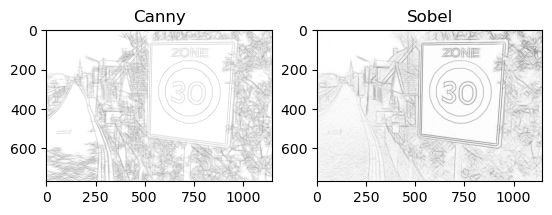

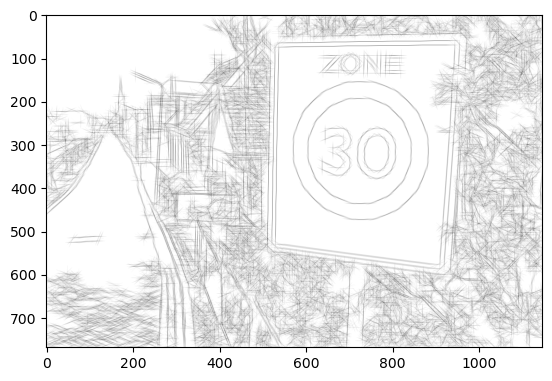

In [12]:
ax1=plt.subplot(221)
ax1.imshow(strokesC,cmap='gray')
ax1.set_title('Canny')
ax2=plt.subplot(222)
ax2.imshow(strokesS,cmap='gray')
ax2.set_title('Sobel')
plt.show()

plt.imshow(strokesC, cmap='gray')
plt.show()


## TONE MAP

In [13]:

##TONE MAP
#####Parametros aprendidos paper
w1, w2, w3=76,22,2#11,37,52   #382, 7, 11
desv_b=9
u_a=105
u_b=225
media_d=90
desv_d=11
lap_peak=255
p = np.zeros(256)
Z=0
for i in range(256):
    if i <= lap_peak:
        p1 = w1 * (1 / desv_b) * np.exp(-(255 - i) / desv_b)
    else:
        p1=0

    if (u_a <= i <= u_b):
        p2 = w2* 1 / (u_b - u_a)
    else:
        p2 = 0

    p3 = w3* (1/np.sqrt(2*math.pi*desv_d))*(np.exp(-(i-media_d)**2/(2*desv_d**2)))*0.01
    p[i] = p1 + p2 + p3
    Z=Z+p[i]

p=p/Z

## HISTOGRAM MATCHING

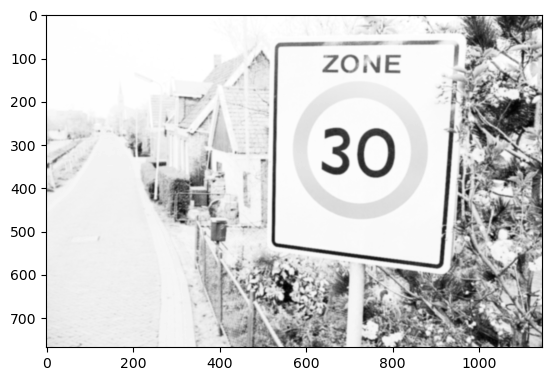

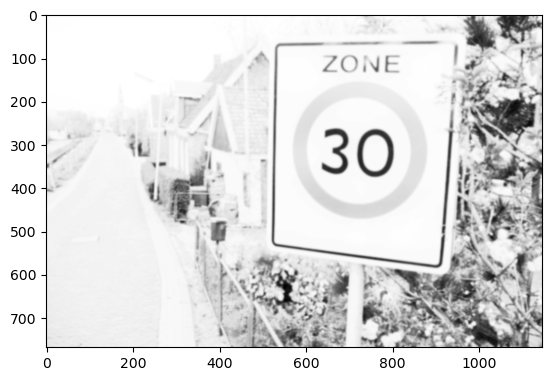

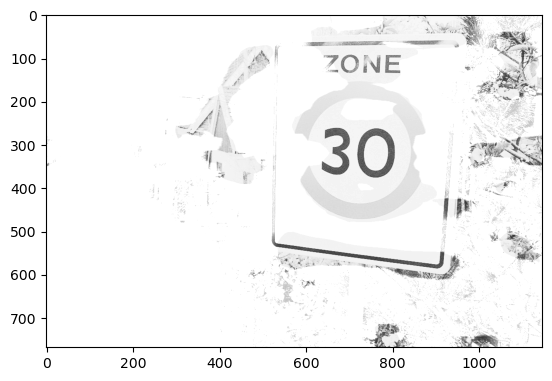

In [14]:
from hist_match import hist_match

mres=mres/255
gray=gray/255

P = np.cumsum(p)
#Equalize
# histograma original:
h = exposure.histogram(gray, nbins=256)
# CDF :
H = np.cumsum(h / np.sum(h))

# Histogram matching:
matched = np.zeros_like(p)
for v in range(256):
    # find the closest value:
    dist = np.abs(P - H[v])
    argmin_dist = np.argmin(dist)##indice del  minimo
    matched[v] = argmin_dist
matched= matched / 256

J = matched[(255 *gray).astype(int)]
J_sal=matched[(255 * (1-salMap)* gray).astype(int)]
# smooth:
J_b = filters.gaussian(J, sigma=np.sqrt(2))

J_lb=np.zeros([height, width]) 

peso=2.0
f=0
for i in range(height):
    for j in range(width):
        if binMap_b[i,j] == 0:
            if peso<2.0:
                peso=peso+0.03
            J_lb[i,j]=np.clip(J[i,j]*peso,0,1)
        elif binMap_b[i,j] == 1:   
            if peso >1.0:
                peso=peso-0.03
            J_lb[i,j]=np.clip(J[i,j]*peso,0,1)
                
        

J=hist_match(gray,p)
JMRES=hist_match(mres,p)

plt.imshow(J, cmap='gray')
plt.show()
plt.imshow(JMRES, cmap='gray')
plt.show()
plt.imshow(J_lb, cmap='gray')
plt.show()
#multi = True if P.shape[-1] > 1 else False
#matched = exposure.match_histograms(gray, p)

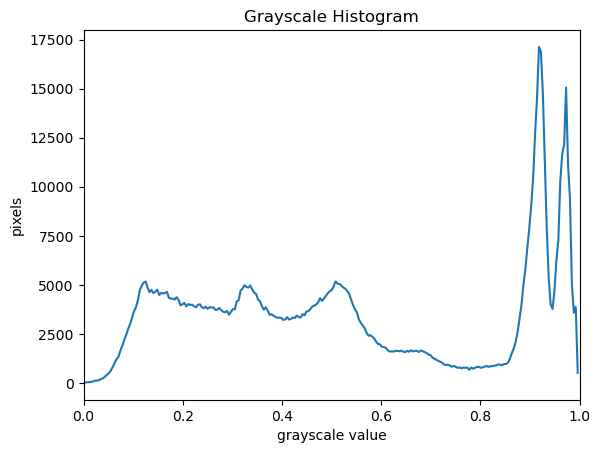

In [15]:
histogram, bin_edges = np.histogram(gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()


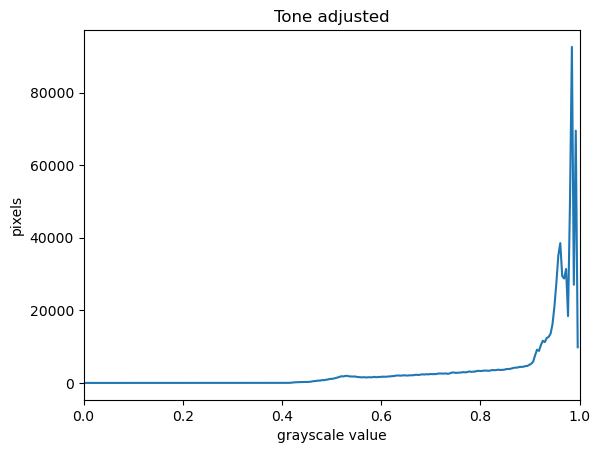

In [16]:
histogram, bin_edges = np.histogram(J, bins=256, range=(0, 1))
plt.figure()
plt.title("Tone adjusted")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()


## PENCIL RENDERING

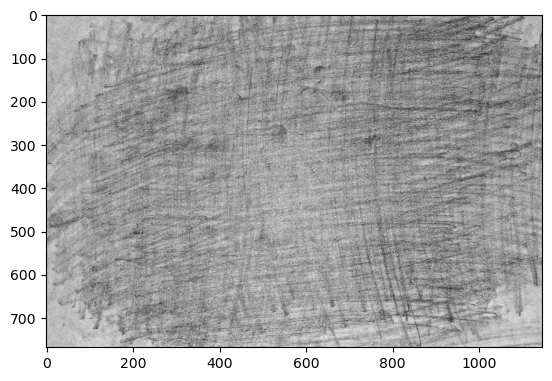

In [17]:
from scipy import  sparse
from gen_pencil_texture import *
H= cv2.imread('pencils/pencil0.jpg')
H=cv2.cvtColor(H, cv2.COLOR_BGR2GRAY)*(1/255.0)

#Lambda
l = 0.2
# Adjust the input to correspond
H_res = cv2.resize(H, dim)

plt.imshow(H_res, cmap='gray')
plt.show()

H_f=H_res.flatten()
logH = np.log(H_f)

#print('H_f=\n ', H_f)    
#print('logH=\n ', logH)    
J_f= J.flatten()
logJ = np.log(J_f)
    
# In order to use Conjugate Gradient method we need to prepare some sparse matrices:
#print('ravel=\n ', logH.ravel())
logH_sparse = sparse.spdiags(logH, 0, height*width, height*width) # 0 - from main diagonal
#print('logHarr=\n',logH_sparse.toarray())

e = np.ones((height * width, 1))

ee = np.concatenate((-e,e), axis=1)

diags_x = [0, height*width]

diags_y = [0, 1]

ddx = sparse.spdiags(e.T, 0, height*width, height*width)

dddx=sparse.identity(height*width)

dx = sparse.spdiags(ee.T, diags_x, height*width, height*width)

dy = sparse.spdiags(ee.T, diags_y, height*width, height*width)

# Compute matrix X and b: (to solve Ax = b)
A =  l*((dx @ dx.T) + (dy @ dy.T)) + logH_sparse.T @ logH_sparse
#print('A=\n', A)
#print('Aarr =\n', A.toarray())
b = logH_sparse.T @ logJ
#print('b=\n',b )
    
# Conjugate Gradient
beta = sparse.linalg.cg(A, b, tol=1e-6, maxiter=60)
    
# Adjust the result
beta_reshaped = np.reshape(beta[0], (height, width))
    
# The final pencil texture map T
T = np.power(H_res, beta_reshaped)

#T=gen_pencil_texture(J)
TMRES=gen_pencil_texture(JMRES)
T_lb=gen_pencil_texture(J_lb)
out=np.ones([height, width]) 

for i in range(height):
    for j in range(width):
         if binMap_b[i,j] == 1:
            out[i,j]=T[i,j]




In [18]:
print(beta_reshaped)

[[0.00403214 0.00582202 0.00693018 ... 0.14449815 0.11945423 0.08342774]
 [0.03065249 0.01453368 0.0098722  ... 0.14005349 0.11718135 0.08291098]
 [0.0309824  0.01500705 0.01018284 ... 0.11508039 0.09739288 0.07021334]
 ...
 [0.12486019 0.09254838 0.08297503 ... 0.31935474 0.29857087 0.24777582]
 [0.12865241 0.09049072 0.0783051  ... 0.35778207 0.350508   0.30652572]
 [0.14703786 0.09600438 0.07940392 ... 0.38042255 0.41589486 0.43844285]]


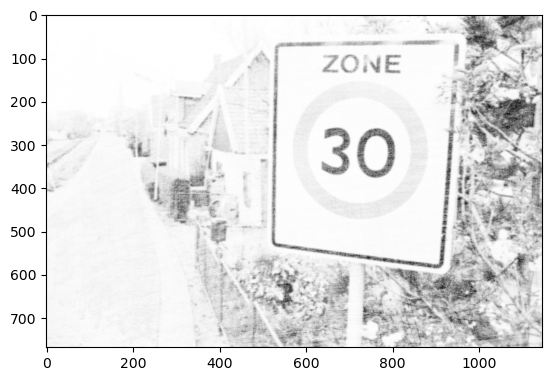

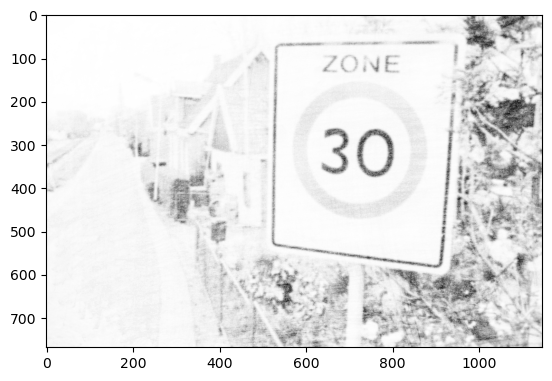

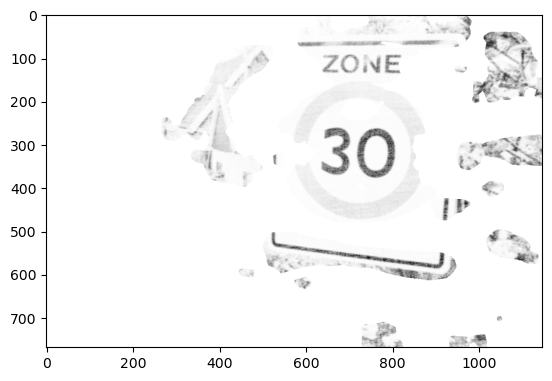

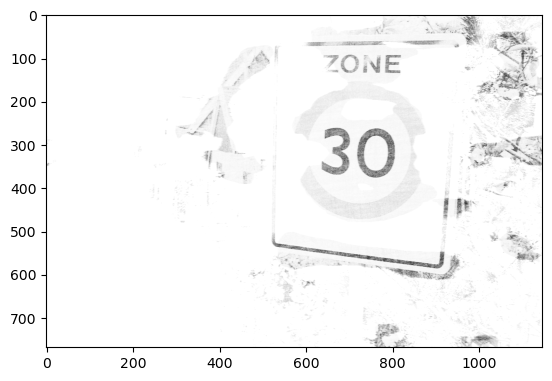

In [19]:
plt.imshow(T, cmap='gray')
plt.show()
plt.imshow(TMRES, cmap='gray')
plt.show()
plt.imshow(out, cmap='gray')
plt.show()
plt.imshow(T_lb, cmap='gray')
plt.show()

strokes=
 [[0.9944707  0.98552166 0.99042983 ... 0.79845931 0.80138545 0.77763215]
 [0.99367296 0.98248033 0.98340722 ... 0.78775558 0.83159644 0.78899467]
 [0.99054657 0.98087926 0.98333937 ... 0.65948139 0.7241211  0.67144787]
 ...
 [0.98286659 0.95351927 0.97346814 ... 0.93878132 0.97217815 0.97118662]
 [0.97296259 0.94329479 0.95905571 ... 0.8921701  0.939616   0.93138788]
 [0.96835251 0.94088665 0.95629543 ... 0.88348972 0.93138819 0.93417259]]
T=
 [[0.99866312 0.99812914 0.99781158 ... 0.95317472 0.95593562 0.9681506 ]
 [0.99033888 0.99541832 0.99688956 ... 0.95525676 0.957388   0.96919982]
 [0.99012727 0.99527143 0.99687675 ... 0.96165767 0.96402771 0.97356935]
 ...
 [0.96790567 0.97421904 0.97835036 ... 0.92191327 0.92760901 0.94173619]
 [0.9683704  0.97472844 0.98037455 ... 0.90815235 0.91538467 0.91907028]
 [0.96059639 0.971362   0.97896123 ... 0.88812622 0.88828746 0.87693634]]
F=
 [[0.99314121 0.98367789 0.98826235 ... 0.76107123 0.76607289 0.75286503]
 [0.98407297 0.977978

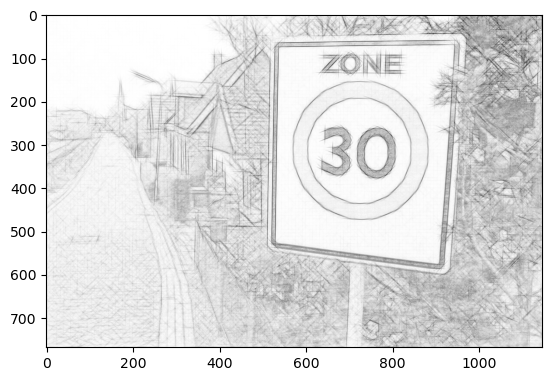

In [20]:
strokes=strokes
print('strokes=\n', strokes)
print('T=\n', T)

F=np.clip(np.multiply(strokes,T),0,1)
print('F=\n', F)
plt.imshow(F, cmap='gray')
plt.show()
